<a href="https://colab.research.google.com/github/PMLS-2026/week-5-IsaiasPena/blob/main/Midterm_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Flow Cytometry PMLS 5.6

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks


In [4]:
file_name = 'flowCytometry.npy'

try:
    data = np.load(file_name)
    print(f"Successfully loaded '{file_name}' into a NumPy array.")
    print("Data shape:", data.shape)
    print("First 5 rows:\n", data[:5])
except Exception as e:
    print(f"Error loading '{file_name}': {e}")

Successfully loaded 'flowCytometry.npy' into a NumPy array.
Data shape: (9320,)
First 5 rows:
 [2113.37231     272.828949   1542.6012     1262.26514       8.17493534]


**A. Erez and coauthors activated many individual immune system cells (mouse T lymphocytes), treated them with a drug of interest, and then exposed them to other cells that would normally stimulate them (antigen presenting cells). One actor in the response mechanism was flourescently labeled in the cells (ppERK), and the flourescence levels were found for each cell individually (flow cytometry). Each row in the dataset gives the fluorescence intensity x in arbitrary units, and hence is proportional to the population of the response molecule in a single cell.**

This problem is looking at mouse T lymphocytes responding to stimulation by antigen presenting cells (APC). Activation was measured by the flourescent siganling molecule ppERK at the single cell level using flow cytometry. Flow cytometry is a microfluidic analysis system that forces cells into a single file stream. The cells will pass through lasers, and detectors will measure the light scatter/fluorescence, and turn it into data.

This problem asked for rescaling histograms to estimate the probability density function (PDF) of fluorescence intensity. It asked to analyze both the raw values and the logarithm of the values.

The dataset for this problem consisted of single cell fluorescence intensity measurements obtained by flow cytometry.

**Make a histogram of x. rescale it to obtain an estimate of the PDF. How many maxima does it have? Where are they located? Also indicate on your graph the location of the median**

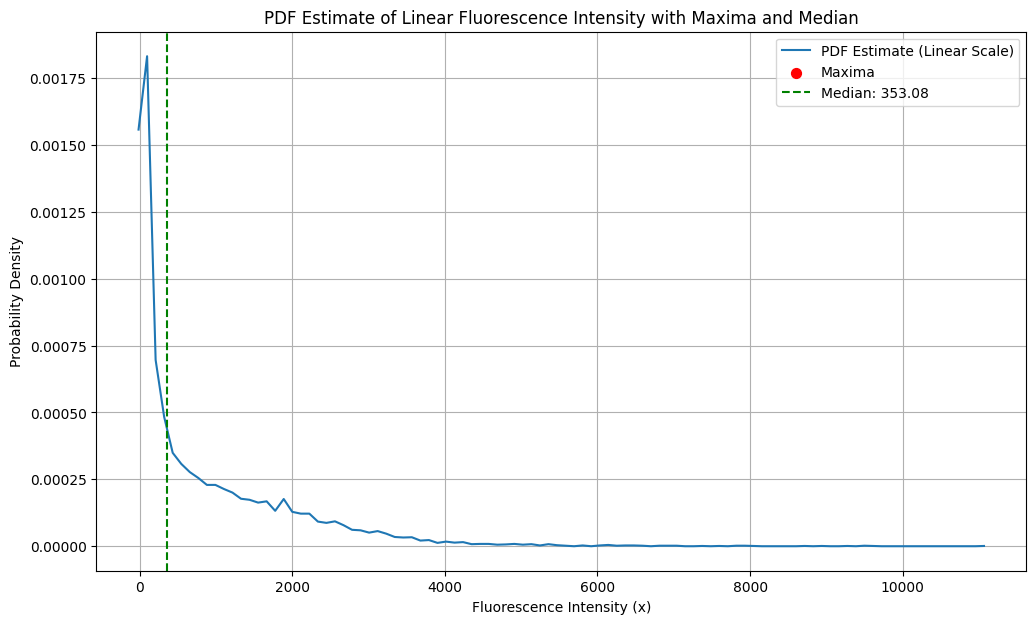

Number of maxima detected in linear data: 0
No distinct maxima found with the current parameters.
Median of Linear Fluorescence Intensity: 353.08


In [17]:
bins = 100
hist, bin_edges = np.histogram(data, bins=bins, density=False)
bin_width = bin_edges[1] - bin_edges[0]


pdf_estimate_linear = hist / (len(data) * bin_width)


bin_centers_linear = (bin_edges[:-1] + bin_edges[1:]) / 2


median_linear_data = np.median(data)


peaks_linear, _ = find_peaks(pdf_estimate_linear, prominence=0.0001, width=5)


plt.figure(figsize=(12, 7))
plt.plot(bin_centers_linear, pdf_estimate_linear, label='PDF Estimate (Linear Scale)')
plt.scatter(bin_centers_linear[peaks_linear], pdf_estimate_linear[peaks_linear],
            color='red', marker='o', s=50, zorder=5, label='Maxima')
plt.axvline(median_linear_data, color='green', linestyle='--',
            label=f'Median: {median_linear_data:.2f}')

plt.xlabel('Fluorescence Intensity (x)')
plt.ylabel('Probability Density')
plt.title('PDF Estimate of Linear Fluorescence Intensity with Maxima and Median')
plt.legend()
plt.grid(True)
plt.show()


print(f"Number of maxima detected in linear data: {len(peaks_linear)}")
if len(peaks_linear) > 0:
    print("Locations of maxima (Intensity, PDF value):")
    for i, peak_idx in enumerate(peaks_linear):
        print(f"  Maximum {i+1}: Intensity = {bin_centers_linear[peak_idx]:.2f}, PDF = {pdf_estimate_linear[peak_idx]:.5f}")
else:
    print("No distinct maxima found with the current parameters.")
print(f"Median of Linear Fluorescence Intensity: {median_linear_data:.2f}")

This graph shows a strong skew to the right, meaning that most of the cells had low fluorescence. The median for this graph was located on the lower end.

**Data of this sort are very often presented logarithmically. Make a histogram of log10(x). Rescale it to obtain an estimate of the PDF. How many maxima does it have? Where are they located? Are there any data points that cannot be represented in this way? Also indicate on your graph the location of the median and comment**

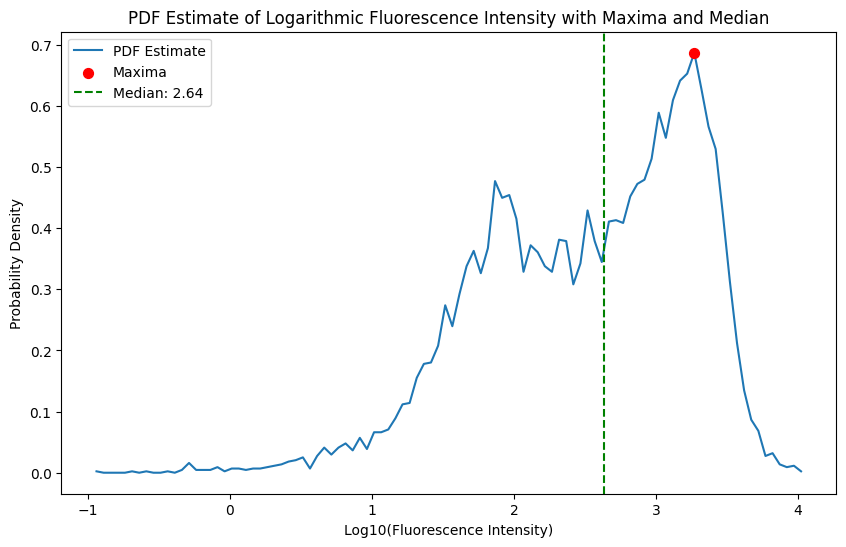

Number of data points not included (non-positive): 569
Locations of maxima:
  Maximum 1: Log10(Intensity) = 3.27, PDF = 0.687
Median of Log10(Fluorescence Intensity): 2.64


In [11]:
file_name = 'flowCytometry.npy'
try:
    data = np.load(file_name)
except FileNotFoundError:
    print(f"Error: '{file_name}' not found. Please ensure it is uploaded.")
    raise


positive_data = data[data > 0]


log_data = np.log10(positive_data)


bins = 100
hist, bin_edges = np.histogram(log_data, bins=bins, density=False)
bin_width = bin_edges[1] - bin_edges[0]

pdf_estimate = hist / (len(log_data) * bin_width)


bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

median_log_data = np.median(log_data)


peaks, _ = find_peaks(pdf_estimate, prominence=0.01, width=5)


plt.figure(figsize=(10, 6))
plt.plot(bin_centers, pdf_estimate, label='PDF Estimate')
plt.scatter(bin_centers[peaks], pdf_estimate[peaks], color='red', marker='o', s=50, zorder=5, label='Maxima')
plt.axvline(median_log_data, color='green', linestyle='--', label=f'Median: {median_log_data:.2f}')

plt.xlabel('Log10(Fluorescence Intensity)')
plt.ylabel('Probability Density')
plt.title('PDF Estimate of Logarithmic Fluorescence Intensity with Maxima and Median')
plt.legend()
plt.show()

print(f"Number of data points not included (non-positive): {len(data) - len(positive_data)}")
print("Locations of maxima:")
for i, peak_idx in enumerate(peaks):
    print(f"  Maximum {i+1}: Log10(Intensity) = {bin_centers[peak_idx]:.2f}, PDF = {pdf_estimate[peak_idx]:.3f}")
print(f"Median of Log10(Fluorescence Intensity): {median_log_data:.2f}")

**If your graphs apoear qualitatively different, what could be the reason? Do you think there were two distinct subpopulation of cells?**

With the log10 graph we can see multiple peaks which suggests that there are two groups of cells. One group that is strongly activated, and another group that is weakly activated.

From this dataset I was able to learn how there were two subpopulations of cells at play here. With the help of some online sources I was able to learn how to make these type of graphs. This is a skill I can potentially use soon when taking some immunofluorescence images of cells.